## Lab 5: Insurance Costs
### Instructions

You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final knitted file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

There may be a small penalty for submissions that are difficult to read or navigate.

## Part 1: Data Exploration

The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:


*   Age of primary beneficiary
*   Gender of primary beneficiary (only female, male recorded)
*   Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   Whether the beneficiary smokes
*   The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.
*   Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

1.   Read in the dataset, and display some summaries of the data.
2.   Fix any concerns you have about the data.
3.   Make up to three plots comparing the response variable (`charges`) to one of the predictor variables. Briefly discuss each plot.














1.   Read in the dataset, and display some summaries of the data.

In [233]:
from google.colab import files
uploaded = files.upload()

Saving insurance_costs_1.csv to insurance_costs_1 (4).csv


In [234]:
import pandas as pd


In [236]:
import io
import pandas as pd

# Access the correct key from the 'uploaded' dictionary
df = pd.read_csv(io.BytesIO(uploaded['insurance_costs_1 (4).csv']))

In [4]:
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [5]:
# Data Summaries

df.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


The summary statistics for the data provide an overview of the distribution of each variable:

1. **Count**: Each column has 431 entries, indicating no missing values.
  
2. **Mean (Average)**:
   - **Age**: The average age of individuals in the dataset is around 38 years.
   - **BMI**: The average Body Mass Index is approximately 30.77, suggesting a generally higher BMI than the ideal range (18.5 to 24.9).
   - **Charges**: The average medical charges billed are about $12,297.

3. **Standard Deviation (Std)**:
   - **Age**: 16.36, showing considerable variation in the ages of individuals.
   - **BMI**: 6.11, indicating some variability in BMI values.
   - **Charges**: 11,876.53, with a wide range in medical charges, suggesting that certain individuals incur significantly higher medical costs than others.

4. **Minimum and Maximum**:
   - **Age** ranges from 18 to 64, covering a broad spectrum of adults.
   - **BMI** ranges from 15.96 to 49.06, with some individuals below and many above the ideal BMI range.
   - **Charges** vary widely from
   $1,131.51 to $55,135.40, reflecting the variability in health costs, possibly due to factors like age, smoking status, and BMI.

5. **Percentiles (25%, 50%, 75%)**:
   - **Age**: The median age (50th percentile) is 34, with 75% of the individuals being 55 or younger.
   - **BMI**: The median BMI is 30.59, with a similar trend in distribution as the mean.
   - **Charges**: The 25th percentile is around $2,710, the median is approximately $9,866, and the 75th percentile is around $14,510, showing a positively skewed distribution where some individuals incur much higher charges than others.



In [6]:
df.isnull().sum()  # Check for missing values

,0
age,0
sex,0
bmi,0
smoker,0
region,0
charges,0


Verifies that there is no missing values in the insurance cost data set

In [7]:
# Data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


In [8]:
df[["sex", "charges"]].groupby("sex").mean()


,charges
sex,
female,11919.373162
male,12709.661784


In [9]:

import pandas as pd

# Mean charges for male and female
mean_charges_by_sex = df[["sex", "charges"]].groupby("sex").mean()

mean_charges_male = mean_charges_by_sex.loc["male", "charges"]
mean_charges_female = mean_charges_by_sex.loc["female", "charges"]

# Percentage difference
percentage_difference = ((mean_charges_male - mean_charges_female) / mean_charges_female) * 100

percentage_difference

6.630286770115991

On average, men are charged 6.63% more for insurance than female.




In [10]:
mean_charges_by_smoker_region = df.groupby(['smoker', 'region'])['charges'].mean()
mean_charges_by_smoker_region

mean_charges_by_sex_bmi = df.groupby(['sex', pd.cut(df['bmi'], bins=[0, 25, 30, float('inf')], labels=['Healthy', 'Overweight', 'Obese'])])['charges'].mean()
mean_charges_by_sex_bmi

<ipython-input-10-4b4073da7889>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_charges_by_sex_bmi = df.groupby(['sex', pd.cut(df['bmi'], bins=[0, 25, 30, float('inf')], labels=['Healthy', 'Overweight', 'Obese'])])['charges'].mean()


sex     bmi       
female  Healthy       10607.418165
        Overweight     9610.317782
        Obese         13682.913976
male    Healthy        9357.386571
        Overweight    10327.166074
        Obese         14900.916728
Name: charges, dtype: float64

By grouping the `'sex'` and `'bmi'` categories we can see  the average insurance charges based on both gender and BMI category:

1. **BMI Categories**:
   - The BMI is divided into three categories:
     - **Healthy**: BMI less than or equal to 25.
     - **Overweight**: BMI between 25 and 30.
     - **Obese**: BMI greater than 30.

2. **Average Charges by Category**:
   - For each combination of **sex** and **BMI category**, the average insurance charges are calculated:
     - **Female**:
       - **Healthy**: Average charge is around $10,607.
       - **Overweight**: Average charge is approximately $9,610.
       - **Obese**: Average charge is about $13,682.
     - **Male**:
       - **Healthy**: Average charge is around $9,358.
       - **Overweight**: Average charge is approximately $10,327.
       - **Obese**: Average charge is about $14,901.

3. **Interpretation**:
   - Generally, as BMI increases from "Healthy" to "Obese," the average insurance charges also increase for both males and females.
   - Females in the "Healthy" category have slightly higher average charges than males in the same category.
   - The "Obese" category shows the highest average charges for both genders, with males having slightly higher charges than females.



In [11]:
df[["smoker", "charges"]].groupby("smoker").mean()

,charges
smoker,
no,7528.467642
yes,31152.372644


On average, insurance charges for smokers are much higher thtan smokers, which likely reglects the additional health risks associated with smoking.



In [12]:
df[["region", "charges"]].groupby("region").mean().sort_values(by = "charges", ascending = False)


,charges
region,
southeast,13916.786760
northeast,11985.217747
southwest,11765.159818
northwest,11097.220696


On average, the Southeast has the highest insurance charge of around $13,917 compared to the lowest insurance charge of $11,097 in the Northwest region. This difference could be due to varying health factors, lifestyle differences, or other socio-economic factors across regions.

In [13]:
df[["bmi", "charges"]].groupby("bmi").mean().sort_values(by = "charges", ascending = False)


,charges
bmi,
37.700,48824.45000
40.920,48673.55880
39.900,48173.36100
46.200,45863.20500
32.015,45710.20785
...,...
20.300,1242.26000
19.800,1241.56500
43.010,1149.39590


On average, insurance charges are higher for higher BMI values. This pattern suggests that BMI is an important predictor of medical expenses, likely due to the health risks associated with being overweight or obese.

2.   Fix any concerns you have about the data.


In [14]:
# Step 1: Convert categorical columns (sex, smoker, and region) into dummy variables
categorical_columns = ['smoker', 'region', 'sex']

# Create dummy variables for each category in the specified columns
df_with_dummies = pd.get_dummies(df, columns=categorical_columns, dtype=int) # specify dtype within get_dummies
df_with_dummies

,age,bmi,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,16884.92400,0,1,0,0,0,1,1,0
1,33,22.705,21984.47061,1,0,0,1,0,0,0,1
2,32,28.880,3866.85520,1,0,0,1,0,0,0,1
3,31,25.740,3756.62160,1,0,0,0,1,0,1,0
4,60,25.840,28923.13692,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,1,0,0,0,0,1,1,0
427,18,31.920,2205.98080,1,0,1,0,0,0,1,0
428,18,36.850,1629.83350,1,0,0,0,1,0,1,0
429,21,25.800,2007.94500,1,0,0,0,0,1,1,0


In [15]:
# Number of females and males
gender_counts = df['sex'].value_counts()
print("\nNumber of Female and Makes:\n", gender_counts)

# Number of smokers and non-smokers
smoker_counts = df['smoker'].value_counts()
print("\nNumber of Smokers and Non-Smokers:\n", smoker_counts)

# Number of individuals in each region
region_counts = df['region'].value_counts()
print("\nNumber of Individuals in Each Region:\n", region_counts)


Number of Female and Makes:
 sex
female    225
male      206
Name: count, dtype: int64

Number of Smokers and Non-Smokers:
 smoker
no     344
yes     87
Name: count, dtype: int64

Number of Individuals in Each Region:
 region
southeast    125
northeast    108
southwest    103
northwest     95
Name: count, dtype: int64


3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

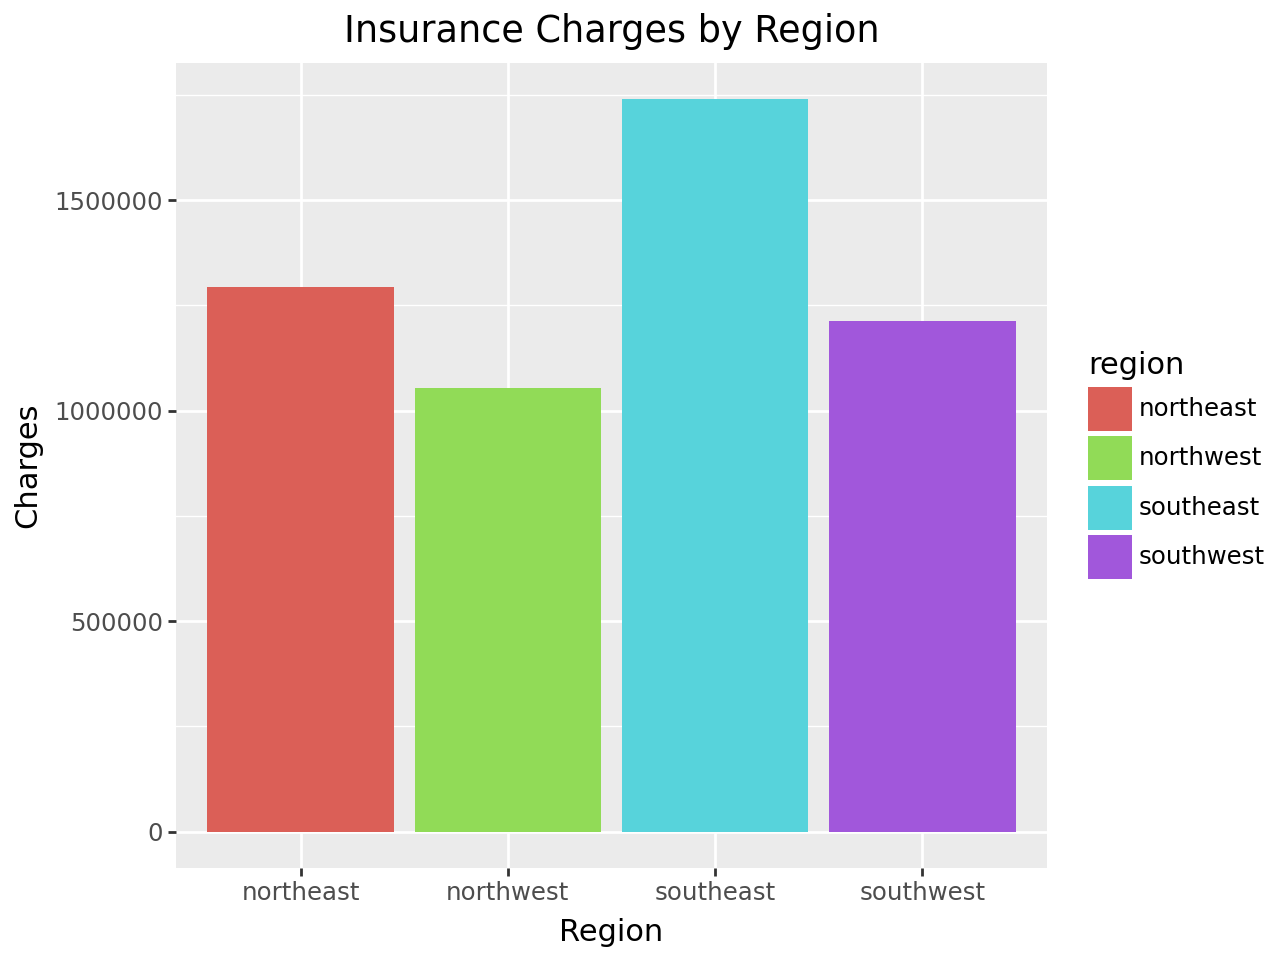

In [16]:
from plotnine import *

plot1 = (ggplot(df, aes(x = "region", y = "charges", fill = "region"))
  +geom_bar(stat='identity')
  +ggtitle("Insurance Charges by Region")
  +xlab("Region")
  +ylab("Charges")
  )
plot1

This bar plot shows the total insurance charges billed by health insurance for each region. The Southeast region has the highest total charges, followed by the Southwest, Northeast, and Northwest regions.

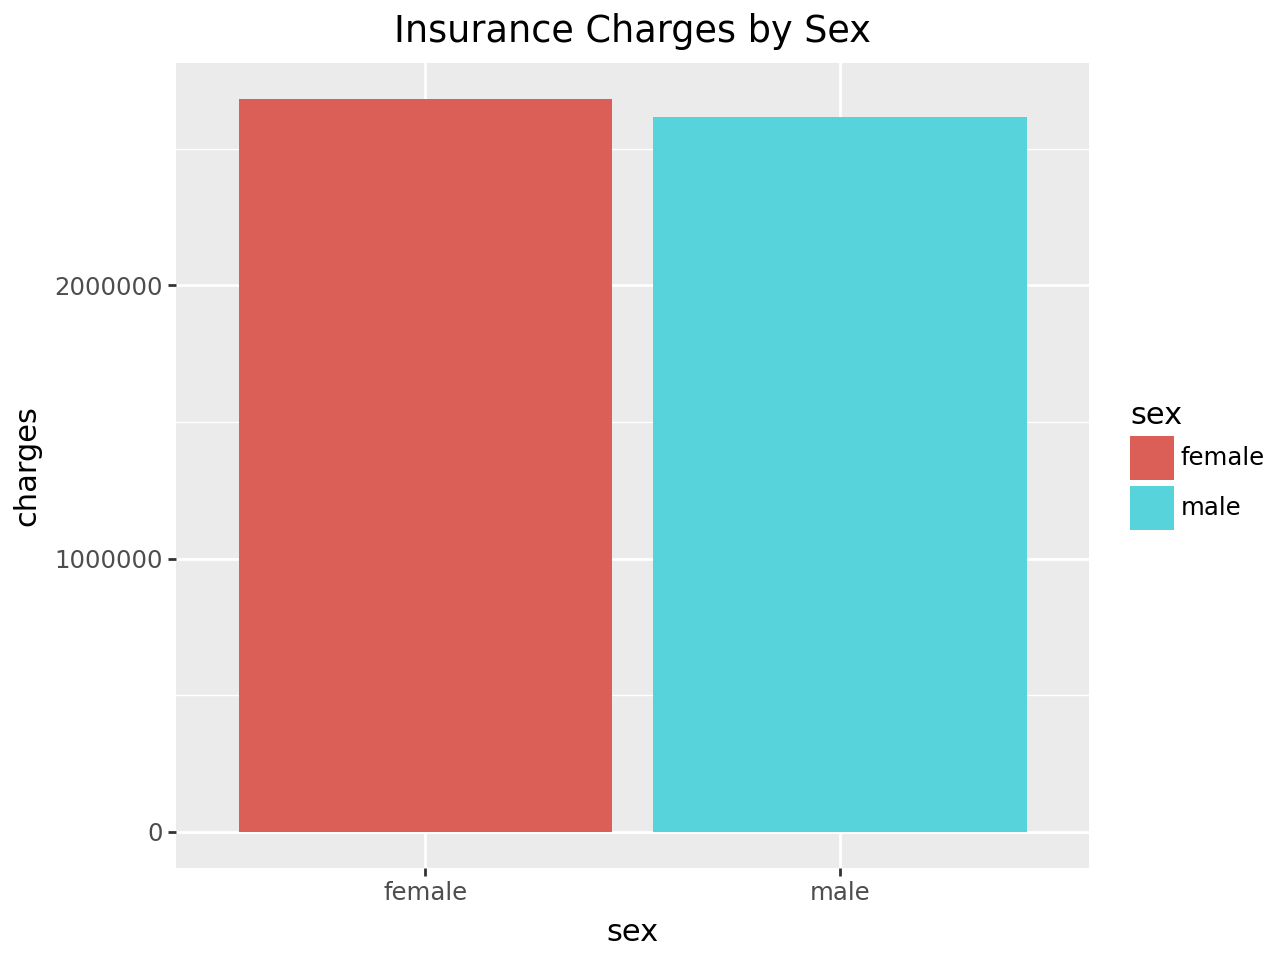

In [17]:
plot2 = (ggplot(df, aes(x = "sex", y = "charges", fill = "sex"))
 + geom_col()
 + ggtitle("Insurance Charges by Sex")
)

plot2

This bar plot compares the insurance charges for females compared to males. The chart shows that the insurance charges are slightly higher for females than for males. However, it's important to note that there are more females (225) than males (206) in the dataset, which may contribute to the higher total charges for females.

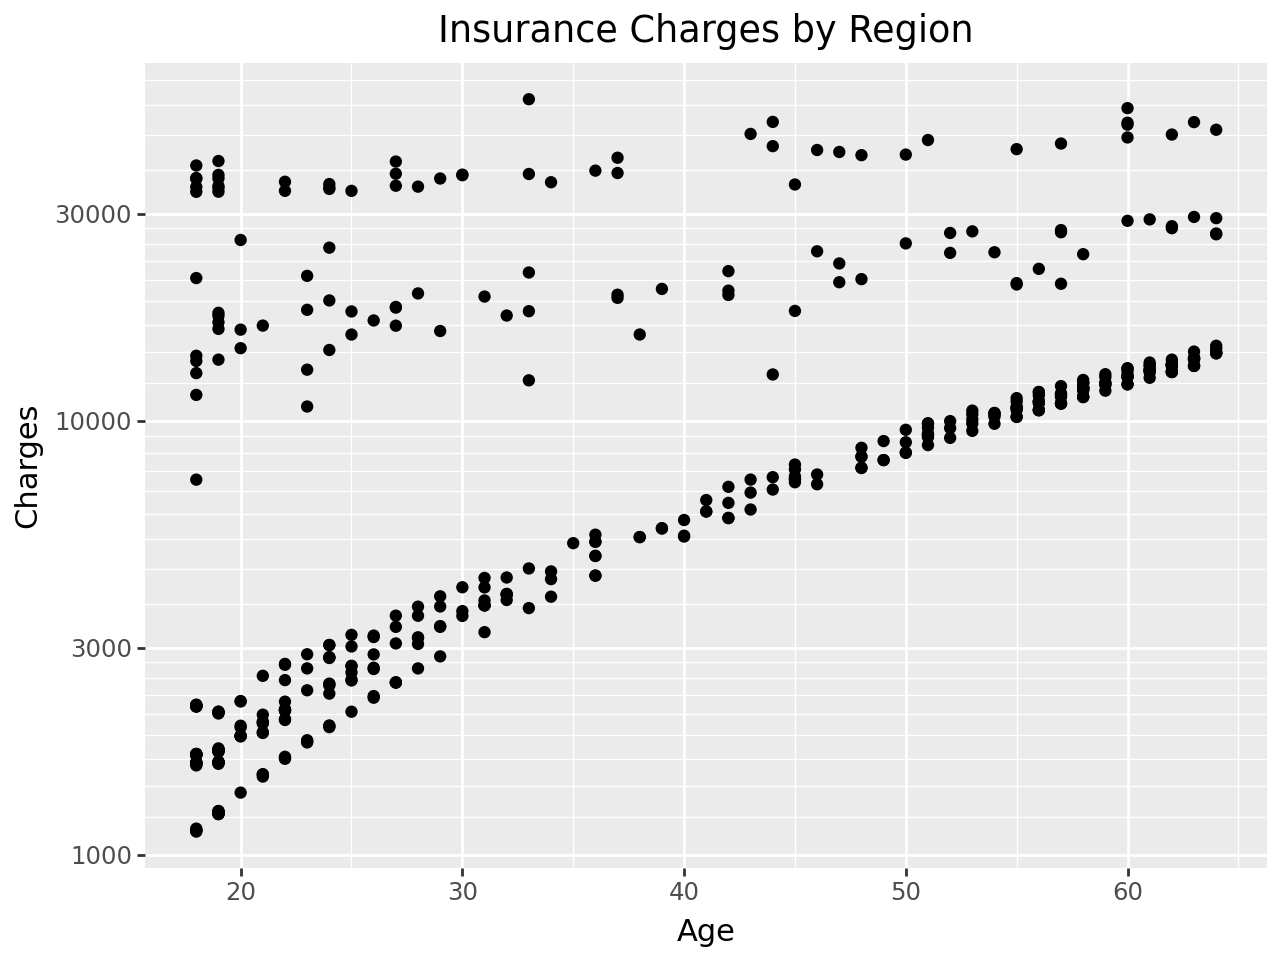

In [18]:
plot3 = (ggplot(df, aes( x='age', y='charges'))
   +geom_point()
   +scale_y_log10()
   +ggtitle("Insurance Charges by Region")
   +xlab("Age")
   +ylab("Charges")
   )

plot3

This plot shows a positive correlation between age and insurance charges, with charges generally increasing as age rises. The logarithmic scale on the y-axis compresses the range of higher charges, making the distribution clearer across age groups. Two distinct clusters are visible: a lower cluster with charges below $10,000 and an upper cluster with higher charges, likely representing higher-risk individuals.

## Part 2: Simple Linear Models



1.   Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.
2.   Make a model that also incorporates the variable `sex`. Report your results.
3.   Now make a model that does not include `sex`, but does include `smoker`. Report your results.
4.   Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.


1.   Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from re import X
import plotnine as p9
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df_with_dummies[["age"]]
y = df_with_dummies["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LinearRegression()

pipe1 = Pipeline(
    [('ols', lr)]
)

fit_pipe1 = pipe1.fit(X_train, y_train)
fit_pipe1

y_preds = fit_pipe1.predict(X_test)
fit_pipe1.named_steps['ols'].coef_

array([227.30894702])

In [54]:
r2_m1 = r2_score(y_test, y_preds)
r2_m1

0.09372991889032833

In [55]:
mse_m1 = mean_squared_error(y_test, y_preds)
mse_m1

121610231.87393601

In [56]:
predict_age_charge = pd.DataFrame({"Age": X_test["age"],
                            "Test Charges": y_test,
                            "Prediction Charges": y_preds})
predict_age_charge.head()

,Age,Test Charges,Prediction Charges
360,58,11363.28320,17012.003710
333,48,8269.04400,14738.914240
88,25,2523.16950,9510.808458
250,37,19539.24300,12238.515822
75,28,2689.49540,10192.735299
...,...,...,...
166,61,12574.04900,17693.930551
146,56,11454.02150,16557.385816
45,22,2045.68525,8828.881617
309,45,35069.37452,14056.987399


### Model 1 (Age) Interpretation:

1. **Model Fit**:
   - **R-squared**: The model has an R-squared value of approximately 0.0937, meaning that around 9.37% of the variability in insurance charges is explained by the age of the beneficiary. This suggests that while age has some predictive power, other factors likely play a more significant role in determining insurance charges.
   - **Mean Squared Error (MSE)**: The MSE of 121,610,231.87 represents the average squared difference between the predicted and actual charges. This value shows the model's error, indicating that predictions deviate significantly from actual charges on average.

2. **Coefficient Estimates**:
   - **Age Coefficient**: The age coefficient is approximately 227.31, which means that for each additional year of age, the insurance charges are expected to increase by about $227.31 on average. This positive relationship indicates that, as expected, older individuals tend to incur higher insurance costs.

In summary, the model shows a positive correlation between age and insurance charges, but with a relatively low R-squared, indicating that age alone is not a strong predictor of charges. Including additional variables may improve the model's accuracy and explanatory power.

2. Make a model that also incorporates the variable sex. Report your results

In [72]:
X2 = df_with_dummies[["age", "sex_female"]]
y2 = df_with_dummies["charges"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)

lr = LinearRegression()

pipe2 = Pipeline(
    [('ols', lr)]
)

fit_pipe2 = pipe2.fit(X_train2, y_train2)
fit_pipe2

y_preds2 = fit_pipe2.predict(X_test2)
fit_pipe2.named_steps['ols'].coef_


array([  256.88385621, -1062.20374921])

In [73]:
r2_m2 = r2_score(y_test2, y_preds2)
r2_m2


0.015015438087541244

In [74]:
mse_m2 = mean_squared_error(y_test2, y_preds2)
mse_m2


145628964.18277493

In [76]:
predict_gender_charge = pd.DataFrame({"Sex": X_test2["sex_female"],
                            "Age": X_test2["age"],
                            "Test Charges": y_test2,
                            "Prediction Charges": y_preds2})
predict_gender_charge

,Sex,Age,Test Charges,Prediction Charges
238,1,51,44400.40640,14878.063944
152,0,27,2497.03830,9775.055144
89,1,22,2150.46900,7428.432114
39,0,58,11381.32540,17738.454686
417,0,18,1708.92575,7463.100438
...,...,...,...,...
396,0,58,11938.25595,17738.454686
22,1,27,16577.77950,8712.851395
376,1,18,2200.83085,6400.896689
378,0,57,10982.50130,17481.570830


### Model 2 Interpretation (Age and Sex):

1. **Model Fit**:
   - **R-squared**: The R-squared value of approximately 0.015 indicates that only 1.5% of the variability in insurance charges is explained by the model with age and sex as predictors. This suggests that adding sex as a predictor does not improve the model significantly in terms of explaining the variability in charges.
   - **Mean Squared Error (MSE)**: The MSE is 145,628,964.18, which is higher than the previous model using only age. This further suggests that the addition of sex does not improve the predictive accuracy.

2. **Coefficient Estimates**:
   - **Age Coefficient**: The age coefficient is approximately 256.89, meaning that for each additional year of age, insurance charges are expected to increase by about $256.89 on average, assuming sex remains constant.
   - **Sex Coefficient (Female)**: The coefficient for the `sex_female` variable is approximately -1602.20, suggesting that, on average, females are predicted to have $1,602.20 lower charges than males, holding age constant. This difference, however, may not be substantial enough to explain much variability in charges.

### Summary:
Adding sex as a predictor does not significantly improve the model's performance, as indicated by the low R-squared and higher MSE. This suggests that sex alone may not be a strong predictor of insurance charges, and additional variables may be needed for better accuracy.

3.   Now make a model that does not include `sex`, but does include `smoker`. Report your results.

In [77]:
X3 = df_with_dummies[["age", "smoker_yes"]]
y3 = df_with_dummies["charges"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3)

lr = LinearRegression()

pipe3 = Pipeline(
    [('ols', lr)]
)

fit_pipe3 = pipe3.fit(X_train3, y_train3)
fit_pipe3

y_preds3 = fit_pipe3.predict(X_test3)
fit_pipe3.named_steps['ols'].coef_


array([  251.81064951, 24685.08685037])

In [78]:
r2_m3 = r2_score(y_test3, y_preds3)
r2_m3


0.7036261449745482

In [79]:
mse_m3 = mean_squared_error(y_test3, y_preds3)
mse_m3



38897471.78323296

In [80]:
predict_smoker_charge = pd.DataFrame({"Smoker": X_test3["smoker_yes"],
                            "Age": X_test3["age"],
                            "Test Charges": y_test3,
                            "Prediction Charges": y_preds3})
predict_smoker_charge

,Smoker,Age,Test Charges,Prediction Charges
200,0,19,1242.81600,2546.104713
103,1,52,24393.62240,35540.942998
329,1,24,14571.89080,28490.244811
209,0,56,11658.11505,11863.098745
114,0,46,24603.04837,9344.992250
...,...,...,...,...
388,0,31,4134.08245,5567.832507
281,0,59,12622.17950,12618.530694
69,0,63,13880.94900,13625.773292
20,1,20,14711.74380,27483.002213


### Model 3 Interpretation (Age and Smoker):

1. **Model Fit**:
   - **R-squared**: The model has an R-squared value of approximately 0.703, meaning that 70.3% of the variability in insurance charges is explained by age and smoking status. This is a substantial improvement compared to the previous models, indicating that smoking status is a strong predictor of insurance charges. 38,897,471.78323296
   - **Mean Squared Error (MSE)**: The MSE is 38,897,471.78, which is much lower than in previous models, suggesting better accuracy in predicting charges.

2. **Coefficient Estimates**:
   - **Age Coefficient**: The age coefficient is approximately 251.81, meaning that for each additional year of age, insurance charges are expected to increase by about $251.81 on average, assuming smoking status remains the same.
   - **Smoker Coefficient**: The coefficient for the `smoker_yes` variable is approximately 24,685.87, indicating that smokers are predicted to have insurance charges that are $24,685.87 higher than non-smokers, on average, when controlling for age. This large difference highlights the significant impact of smoking on medical costs.

### Summary:
Including smoking status as a predictor dramatically improves the model's performance, as reflected by the high R-squared and lower MSE. This model demonstrates that smoking status is a key factor in predicting insurance charges, with smokers incurring substantially higher costs than non-smokers.

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.



In [82]:
print("Model 2 (Age and Sex) R-squared:", r2_m2)
print("Model 2 (Age and Sex) MSE:", mse_m2)
print("Model 3 (Age and Smoker) R-squared:", r2_m3)
print("Model 3 (Age and Smoker) MSE:", mse_m3)

Model 2 (Age and Sex) R-squared: 0.015015438087541244
Model 2 (Age and Sex) MSE: 145628964.18277493
Model 3 (Age and Smoker) R-squared: 0.7036261449745482
Model 3 (Age and Smoker) MSE: 38897471.78323296


Justification:

Model 3 (Age and Smoker) has a significantly higher R-squared value (0.703) compared to Model 2 (0.015).
This means Model 3 explains a much larger proportion of the variance in insurance charges.

Model 3 also has a much lower MSE (38,897,471.78) than Model 2 (145,628,964.18).

This indicates that Model 3 makes more accurate predictions of insurance charges.


Conclusion:

Based on both the R-squared and MSE values, Model 3 (Age and Smoker) is a better fit for the data than Model 2 (Age and Sex).
The inclusion of the smoker explanatory variable provides a significantly better explanation and prediction of insurance charges than the sex explanatory variable.

## Part 3: Multiple Linear Models

Now let’s consider including multiple *quantitative* predictors.

1. Fit a model that uses `age` and `bmi` as predictors. (Do not include an interaction term, `age`*`bmi`, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?
2. Perhaps the relationships are not linear. Fit a model that uses `age` and `age^2` as predictors. How do the MSE and R-squared compare to the model in P2 Q1?
3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?
4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?
5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?
6. Plot the predictions from your model in Q4 as a **line** plot on top of the scatterplot of your original data.


1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [100]:
X4 = df_with_dummies[["age", "bmi"]]
y4 = df_with_dummies["charges"]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4)

lr = LinearRegression()

pipe4 = Pipeline(
    [('ols', lr)]
)

fit_pipe4 = pipe4.fit(X_train4, y_train4)
fit_pipe4

y_preds4 = fit_pipe4.predict(X_test4)
fit_pipe4.named_steps['ols'].coef_


array([197.76820263, 289.48618859])

In [101]:
r2_m4 = r2_score(y_test4, y_preds4)
r2_m4

0.16143870724566733

In [102]:
mse_m4 = mean_squared_error(y_test4, y_preds4)
mse_m4

122778746.27859962

In [103]:
predict_bmi_charge = pd.DataFrame({"BMI": X_test4["bmi"],
                            "Age": X_test4["age"],
                            "Test Charges": y_test4,
                            "Prediction Charges": y_preds4})
predict_bmi_charge

,BMI,Age,Test Charges,Prediction Charges
136,33.880,64,46889.26120,18286.030865
221,35.200,59,12244.53100,17679.311621
198,26.840,22,1664.99960,7941.783587
47,29.700,48,7789.63500,13911.687354
258,36.955,60,12741.16745,18385.128084
...,...,...,...,...
19,34.430,36,37742.57570,12907.738595
78,26.730,18,1615.76670,7118.867296
344,26.410,64,14394.55790,16123.569036
351,31.255,21,1909.52745,9022.096907


## Model 4 Interpretation (Age and BMI):

1. **Model Fit**:
   - **R-squared**: The model has an R-squared value of approximately 0.161, meaning that only 16.1% of the variability in insurance charges is explained by age and BMI together. This low R-squared indicates that these two predictors do not explain much of the variation in insurance charges, suggesting the need for additional variables.
   - **Mean Squared Error (MSE)**: The MSE is 122,778,746.28, which is relatively high, indicating a larger average error in predicting charges.

2. **Coefficient Estimates**:
   - **Age Coefficient**: The age coefficient is approximately 197.77, meaning that for each additional year of age, insurance charges are expected to increase by about $197.77 on average, assuming BMI is constant.
   - **BMI Coefficient**: The BMI coefficient is approximately 289.49, indicating that for each unit increase in BMI, insurance charges are expected to increase by about $289.49 on average, assuming age remains constant. This positive relationship suggests that higher BMI values are associated with higher charges.

### Summary:
This model with age and BMI has a low R-squared and high MSE, indicating it does not perform well in explaining or predicting insurance charges. The coefficients suggest that both age and BMI have positive relationships with charges, but additional factors are likely needed to improve prediction accuracy.

In [107]:
print("Model 1 (Age) R-squared:", r2_m1)
print("Model 1 (Age) MSE:", mse_m1)
print("Model 4 (Age and BMI) MSE:", mse_m4)
print("Model 4 (Age and BMI) R-squared:", r2_m4)

Model 1 (Age) R-squared: 0.09372991889032833
Model 1 (Age) MSE: 121610231.87393601
Model 4 (Age and BMI) MSE: 122778746.27859962
Model 4 (Age and BMI) R-squared: 0.16143870724566733


## Model 4 (Age and BMI) vs. Model 1 (Age) Interpretation:

### Model 4:
- **R-squared**: 0.1614, showing that 16.14% of the variance in insurance charges is explained when using both age and BMI.
- **MSE**: 122,778,746.28, slightly higher than the age-only model.

### Model 1:
- **R-squared**: 0.0937, indicating that 9.37% of the variance in insurance charges is explained by age alone.
- **MSE**: 121,610,231.87, representing the average squared error when predicting charges using only age.

### Interpretation:
1. **R-squared Comparison**: The model with both age and BMI has a higher R-squared (0.1614) compared to the model with only age (0.0937). This suggests that adding BMI does improve the model’s ability to explain the variability in insurance charges, albeit modestly.

2. **MSE Comparison**: The MSE for the model with both age and BMI is slightly higher (122,778,746.28) than the age-only model (121,610,231.87), indicating a minor decrease in prediction accuracy. However, the difference is small, suggesting that BMI may not substantially contribute to improving prediction accuracy.

### Conclusion:
Adding BMI as a predictor increases the model’s explanatory power (higher R-squared) but does not significantly improve predictive accuracy (higher MSE). This suggests that BMI adds some information but may not be a strong standalone predictor for insurance charges. Other factors may be needed to create a more robust model.

2. Perhaps the relationships are not linear. Fit a model that uses `age` and `age^2` as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer


X5 = df_with_dummies[["age"]]
y5 = df_with_dummies["charges"]
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5)

lr = LinearRegression()
poly2 = PolynomialFeatures(2, include_bias = False, interaction_only = False)

ct2 = ColumnTransformer(
    [("quadratic", poly2, ["age"])]
)

pipe5 = Pipeline(
    [("age_squared", ct2),('ols', lr)]
)

fit_pipe5 = pipe5.fit(X_train5, y_train5)
fit_pipe5

y_preds5 = fit_pipe5.predict(X_test5)
fit_pipe5.named_steps['ols'].coef_

array([463.75904129,  -2.95875367])

In [116]:
mse_m5 = mean_squared_error(y_test5, y_preds5)
mse_m5

119584272.34341992

In [117]:
r2_m5 = r2_score(y_test5, y_preds5)
r2_m5

0.08928961164933646

In [118]:
print("Model 1 (Age) R-squared:", r2_m1)
print("Model 1 (Age) MSE:", mse_m1)
print("Model 5 (Age and Age^2) MSE:", mse_m5)
print("Model 5 (Age and Age^2) R-squared:", r2_m5)

Model 1 (Age) R-squared: 0.09372991889032833
Model 1 (Age) MSE: 121610231.87393601
Model 5 (Age and Age^2) MSE: 119584272.34341992
Model 5 (Age and Age^2) R-squared: 0.08928961164933646


### Model 5 Interpretation (Age and Age^2):

1. **Model Fit**:
   - **R-squared**: The model has an R-squared value of approximately 0.089, meaning that only 8.9% of the variability in insurance charges is explained by age and age squared together. This low R-squared value indicates that these predictors do not explain much of the variation in insurance charges, suggesting a need for additional variables.
   - **Mean Squared Error (MSE)**: The MSE is 119,584,272.34, which is relatively high, indicating a substantial average error in predicting charges.

2. **Coefficient Estimates**:
   - **Age Coefficient**: The age coefficient is approximately 463.76, meaning that for each additional year of age, insurance charges are expected to increase by about $463.76 on average, assuming the quadratic term remains constant.
   - **Age^2 Coefficient**: The coefficient for the quadratic term (age squared) is approximately -2.96, indicating a slight deceleration in the increase of charges with age. This suggests a mild curve in the relationship between age and charges.

---

### Model 5 (Age and Age^2) vs. Model 1 (Age) Interpretation:

**Model 5 (Age and Age^2):**
- **R-squared**: 0.0893, indicating that 8.93% of the variance in insurance charges is explained when using both age and age squared.
- **MSE**: 119,584,272.34, slightly lower than the age-only model.

**Model 1 (Age Only):**
- **R-squared**: 0.0937, showing that 9.37% of the variance in insurance charges is explained when using only age.
- **MSE**: 121,610,231.87, representing the average squared error when predicting charges using age alone.

---

### Interpretation:

1. **R-squared Comparison**: The model with both age and age squared has a slightly lower R-squared (0.0893) compared to the age-only model (0.0937). This suggests that adding a quadratic term for age does not improve the model’s ability to explain the variability in insurance charges.

2. **MSE Comparison**: The MSE for the model with age and age squared is slightly lower (119,584,272.34) than for the age-only model (121,610,231.87), indicating a minor improvement in prediction accuracy. However, the improvement is minimal, suggesting that the quadratic term does not add significant predictive power.

---

### Conclusion:
Adding a quadratic term for age results in a negligible improvement in prediction accuracy (slightly lower MSE) and a minor decrease in explanatory power (lower R-squared). This suggests that a simple linear relationship between age and charges may be sufficient, or that additional variables beyond age and age squared are needed to improve the model's performance.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [127]:
X6 = df_with_dummies[["age"]]
y6 = df_with_dummies["charges"]
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6)

lr = LinearRegression()
poly4 = PolynomialFeatures(4)

ct6 = ColumnTransformer(
    [("fourth_power", poly4, ["age"])]
)

pipe6 = Pipeline(
    [("age_fourth", ct6),('ols', lr)]
)

fit_pipe6 = pipe6.fit(X_train6, y_train6)
fit_pipe6

y_preds6 = fit_pipe6.predict(X_test6)

In [128]:
mse_m6 = mean_squared_error(y_test6, y_preds6)
mse_m6

98220787.19800225

In [129]:
r2_m6 = r2_score(y_test6, y_preds6)
r2_m6

0.09210712056173298

In [135]:
print("Model 1 (Age) R-squared:", r2_m1)
print("Model 1 (Age) MSE:", mse_m1)
print("Model 6 (Age and Polynomial (4)) MSE:", mse_m6)
print("Model 6 (Age and Polynomial (4)) R-squared:", r2_m6)

Model 1 (Age) R-squared: 0.09372991889032833
Model 1 (Age) MSE: 121610231.87393601
Model 6 (Age and Polynomial (4)) MSE: 98220787.19800225
Model 6 (Age and Polynomial (4)) R-squared: 0.09210712056173298


### Model 6 Interpretation (Age and Polynomial (Degree 4)):

1. **Model Fit**:
   - **R-squared**: The model with age and age polynomial terms up to degree 4 has an R-squared of approximately 0.0921, indicating that only about 9.21% of the variance in insurance charges is explained by this model. This is very similar to the age-only model (0.0937), suggesting that adding higher polynomial terms does not significantly improve the explanatory power.
   - **Mean Squared Error (MSE)**: The MSE for this model is 98,220,787.20, which is an improvement over the age-only model (MSE of 121,610,231.87), indicating a reduction in prediction error.

---

### Model 6 (Age and Polynomial (Degree 4)) vs. Model 1 (Age) Interpretation:

**Model 6 (Age and Polynomial (Degree 4))**:
- **R-squared**: 0.0921, which is close to the R-squared of the age-only model, indicating minimal improvement in explanatory power.
- **MSE**: 98,220,787.20, which is lower than the MSE for the age-only model, suggesting a better fit in terms of prediction accuracy.

**Model 1 (Age Only)**:
- **R-squared**: 0.0937, indicating that 9.37% of the variance in charges is explained by age alone.
- **MSE**: 121,610,231.87, representing the average squared error in predicting charges using only age.

---

### Interpretation:

1. **R-squared Comparison**: The R-squared value of Model 6 (0.0921) is almost the same as the age-only model (0.0937), indicating that adding polynomial terms up to degree 4 does not increase the model's explanatory power significantly.

2. **MSE Comparison**: Model 6 has a lower MSE (98,220,787.20) than the age-only model, which means it achieves slightly better prediction accuracy. However, the difference is moderate, suggesting that higher polynomial terms add only limited improvement in terms of reducing error.

---

### Conclusion:
Using polynomial terms up to degree 4 for age reduces the prediction error slightly (lower MSE) but does not meaningfully increase the model’s explanatory power (similar R-squared). This suggests that higher polynomial terms provide only a marginal improvement and may not be necessary for modeling insurance charges effectively. Additional predictors would likely have a more substantial impact on improving model performance.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [131]:
X7 = df_with_dummies[["age"]]
y7 = df_with_dummies["charges"]
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7,y7)

lr = LinearRegression()
poly12 = PolynomialFeatures(12)

ct12 = ColumnTransformer(
    [("twelfth_power", poly12, ["age"])]
)

pipe7 = Pipeline(
    [("age_twelfth", ct12),('ols', lr)]
)

fit_pipe7 = pipe7.fit(X_train7, y_train7)
fit_pipe7

y_preds7 = fit_pipe7.predict(X_test7)

In [132]:
mse_m7 = mean_squared_error(y_test7, y_preds7)
mse_m7

133993802.93178633

In [134]:
r2_m7 = r2_score(y_test7, y_preds7)
r2_m7

0.08768655263294522

In [136]:
print("Model 1 (Age) R-squared:", r2_m1)
print("Model 1 (Age) MSE:", mse_m1)
print("Model 7 (Age and Polynomial (12)) MSE:", mse_m7)
print("Model 7 (Age and Polynomial (12)) R-squared:", r2_m7)

Model 1 (Age) R-squared: 0.09372991889032833
Model 1 (Age) MSE: 121610231.87393601
Model 7 (Age and Polynomial (12)) MSE: 133993802.93178633
Model 7 (Age and Polynomial (12)) R-squared: 0.08768655263294522


### Model 7 Interpretation (Age and Polynomial (Degree 12)):

1. **Model Fit**:
   - **R-squared**: The model with age polynomial terms up to degree 12 has an R-squared of approximately 0.0877, which is very close to the R-squared of the age-only model (0.0937). This indicates that adding higher polynomial terms up to degree 12 does not improve the explanatory power significantly.
   - **Mean Squared Error (MSE)**: The MSE for this model is 133,993,802.93, which is higher than the age-only model (MSE of 12,161,023.1), indicating a worse fit in terms of prediction accuracy.

---

### Model 7 (Age and Polynomial (Degree 12)) vs. Model 1 (Age) Interpretation:

**Model 7 (Age and Polynomial (Degree 12))**:
- **R-squared**: 0.0877, which is slightly lower than the R-squared of the age-only model, suggesting no improvement in explanatory power.
- **MSE**: 133,993,802.93, which is much higher than the MSE of the age-only model, indicating a worse prediction fit.

**Model 1 (Age Only)**:
- **R-squared**: 0.0937, showing that 9.37% of the variance in charges is explained by age alone.
- **MSE**: 121,610,231.87, representing the average squared error when predicting charges using only age.

---

### Interpretation:

1. **R-squared Comparison**: The R-squared value of Model 7 (0.0877) is lower than the age-only model (0.0937), indicating that adding higher-degree polynomial terms does not improve the model's ability to explain the variability in insurance charges.

2. **MSE Comparison**: Model 7 has a much higher MSE (133,993,802.93) than the age-only model, suggesting that using higher polynomial terms up to degree 12 actually worsens the prediction accuracy. This could be due to overfitting, where the model captures noise rather than the true relationship.

---

### Conclusion:
Adding polynomial terms up to degree 12 for age does not improve the explanatory power (similar R-squared) and worsens the prediction accuracy ( higher MSE). This suggests that higher-degree polynomials introduce overfitting and are not helpful for this model. A simpler model with fewer predictors or lower-degree terms may be preferable for predicting insurance charges effectively.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

In [139]:
data = {
    'Model': ['Model 1 (Age)', 'Model 4 (Age and BMI)', 'Model 5 (Age and Age^2)', 'Model 6 (Age and Polynomial (4))', 'Model 7 (Age and Polynomial (12))'],
    'R-squared': [r2_m1, r2_m4, r2_m5, r2_m6, r2_m7],
    'Mean Squared Error': [mse_m1, mse_m4, mse_m5, mse_m6, mse_m7]
}

df_results = pd.DataFrame(data)

# Sort by R-squared in ascending order and Mean Squared Error in descending order
df_results = df_results.sort_values(['R-squared', 'Mean Squared Error'], ascending=[True, False])
df_results


,Model,R-squared,Mean Squared Error
4,Model 7 (Age and Polynomial (12)),0.087687,1.339938e+08
2,Model 5 (Age and Age^2),0.089290,1.195843e+08
3,Model 6 (Age and Polynomial (4)),0.092107,9.822079e+07
0,Model 1 (Age),0.093730,1.216102e+08
1,Model 4 (Age and BMI),0.161439,1.227787e+08


**Model 4 (Age and BMI)** is the best model, with the highest R-squared value of 0.1614, indicating it explains the most variability in insurance charges among the models tested. However, it has a relatively high Mean Squared Error (MSE) of \(1.227787 \times 10^8\), suggesting that while it offers the best explanatory power, its predictive accuracy could still be improved. This high MSE indicates that other factors may be needed to achieve a more precise model.

6. Plot the predictions from your model in Q4 as a **line** plot on top of the scatterplot of your original data.

In [142]:
predict_models = pd.DataFrame({"Test Charges": y_test7,
              "Prediction Charges": y_preds7,
              "Test Age": X_test7["age"]})
predict_models

,Test Charges,Prediction Charges,Test Age
177,25656.57526,13659.724711,50
261,5662.22500,13384.898494,39
364,20709.02034,14552.970709,57
252,36307.79830,8102.590828,18
182,1708.00140,8102.590828,18
...,...,...,...
430,29141.36030,17892.858618,61
178,3994.17780,12511.411052,32
426,10795.93733,8228.446676,23
223,27037.91410,19851.935697,64


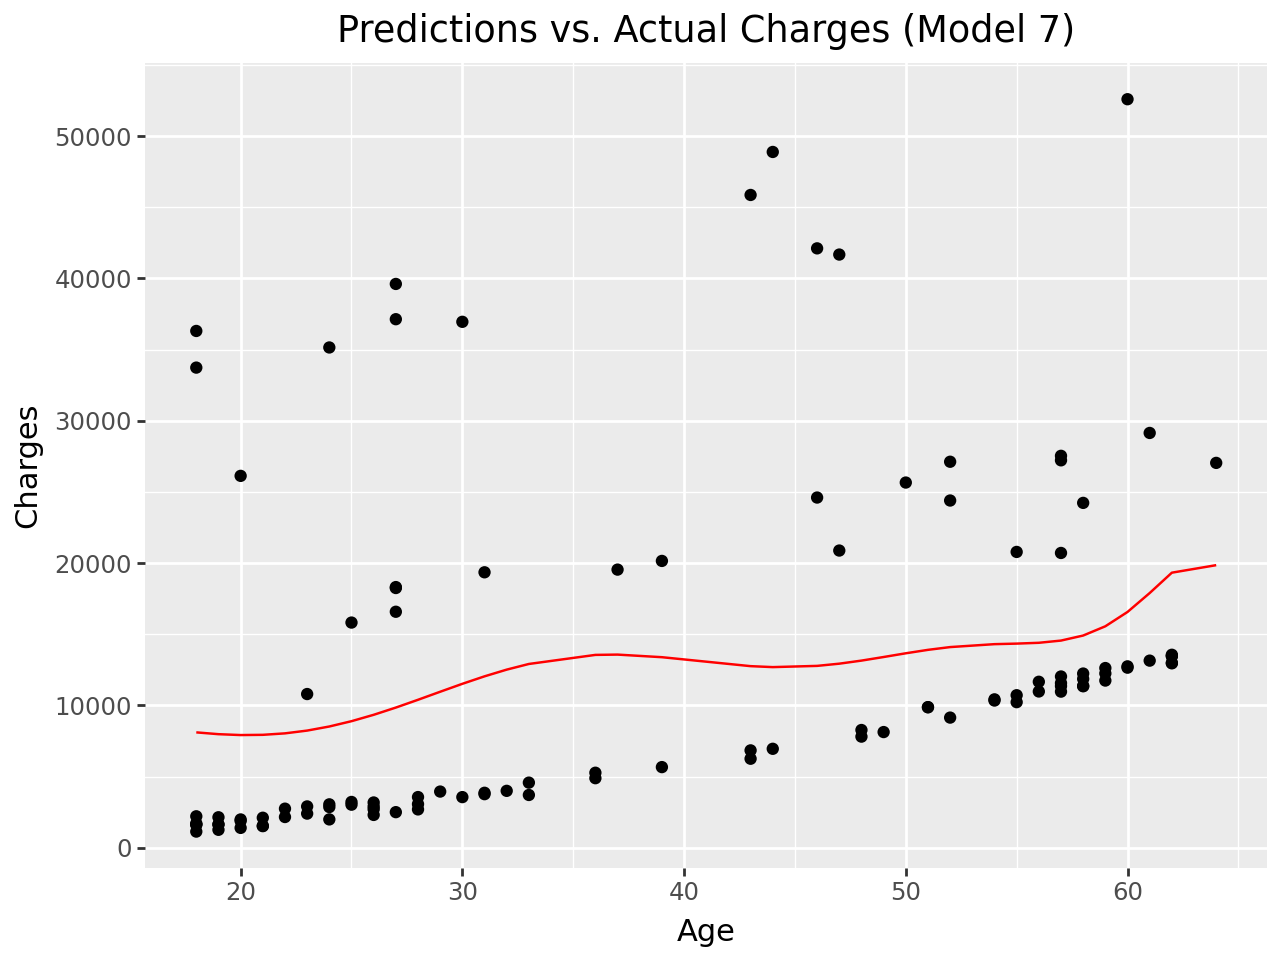

In [146]:
(
    ggplot(predict_models, aes(x='Test Age', y='Test Charges'))
    + geom_point()
    + geom_line(aes(x='Test Age', y='Prediction Charges'), color='red')
    + labs(x='Age', y='Charges', title='Predictions vs. Actual Charges (Model 7)')
)

## Part 4: New Data

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

*   Only `age` as a predictor.
*   `age` and `bmi` as a predictor.
*   `age`, `bmi`, and `smoker` as predictors (no interaction terms)
*   `age`, and `bmi`, with both quantitative variables having an interaction term with `smoker` (i.e. the formula ~ (age + bmi):smoker)
*   `age`, `bmi`, and `smoker` as predictors, with both quantitative variables having an interaction term with `smoker` (i.e. the formula ~ (`age + bmi)*smoker`)

For each model, *fit* the model on the **original data**.

Then, use the fitted model to *predict* on the **new data**.

Report the MSE for each model’s **new** predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [147]:
from google.colab import files
uploaded = files.upload()

Saving insurance_costs_2.csv to insurance_costs_2.csv


In [152]:
import io
import pandas as pd

# Access the correct key from the 'uploaded' dictionary
df2 = pd.read_csv(io.BytesIO(uploaded['insurance_costs_2.csv']))
df2

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400
139,45,male,30.360,yes,southeast,62592.87309
140,43,male,27.800,yes,southwest,37829.72420
141,24,female,27.720,no,southeast,2464.61880


*   Only `age` as a predictor.

In [153]:
# Step 1: Convert categorical columns (sex, smoker, and region) into dummy variables
categorical_columns = ['smoker', 'region', 'sex']

# Create dummy variables for each category in the specified columns
df2_with_dummies = pd.get_dummies(df2, columns=categorical_columns, dtype=int)
df2_with_dummies

,age,bmi,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,23,34.400,1826.84300,1,0,0,0,0,1,0,1
1,56,40.300,10602.38500,1,0,0,0,0,1,0,1
2,18,34.100,1137.01100,1,0,0,0,1,0,0,1
3,63,23.085,14451.83515,1,0,1,0,0,0,1,0
4,63,28.310,13770.09790,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
138,19,34.900,34828.65400,0,1,0,0,0,1,0,1
139,45,30.360,62592.87309,0,1,0,0,1,0,0,1
140,43,27.800,37829.72420,0,1,0,0,0,1,0,1
141,24,27.720,2464.61880,1,0,0,0,1,0,1,0


In [164]:
X = df_with_dummies[["age"]]
y = df_with_dummies["charges"]

lr = LinearRegression()

pipe = Pipeline(
    [('ols', lr)]
)

fit_pipe1 = pipe.fit(X, y)

X_new1 = df2_with_dummies[["age"]]
y_new_preds1 = fit_pipe1.predict(X_new1)


In [165]:
mse_new_m1= mean_squared_error(df2_with_dummies["charges"], y_new_preds1)
mse_new_m1

136077136.50195494

In [215]:
r2_new_m1 = r2_score(df2_with_dummies["charges"], y_new_preds1)
r2_new_m1

0.12236515675533055

*   `age` and `bmi` as a predictor.

In [167]:
X2 = df_with_dummies[["age", "bmi"]]
y2 = df_with_dummies["charges"]

lr = LinearRegression()

pipe = Pipeline(
    [('ols', lr)]
)

fit_pipe2 = pipe.fit(X2, y2)

X_new2 = df2_with_dummies[["age", "bmi"]]
y_new_preds2 = fit_pipe2.predict(X_new2)

In [168]:
mse_new_m2 = mean_squared_error(df2_with_dummies["charges"], y_new_preds2)
mse_new_m2

132636406.1108129

In [216]:
r2_new_m2 = r2_score(df2_with_dummies["charges"], y_new_preds2)
r2_new_m2

0.14455628272331222



*   age, bmi, and smoker as predictors (no interaction terms)



In [174]:
X3 = df_with_dummies[["age", "bmi", "smoker_yes"]]
y3 = df_with_dummies["charges"]


pipe = Pipeline(
    [('ols', lr)]
)

fit_pipe3 = pipe.fit(X3, y3)

X_new3 = df2_with_dummies[['age', 'bmi', 'smoker_yes']]
y_new_preds3 = fit_pipe3.predict(X_new3)


In [175]:
mse_new_m3 = mean_squared_error(df2_with_dummies['charges'], y_new_preds3)
mse_new_m3

35377541.24141632

In [217]:
r2_new_m3 = r2_score(df2_with_dummies["charges"], y_new_preds3)
r2_new_m3

0.7718311565047801

*   `age`, and `bmi`, with both quantitative variables having an interaction term with `smoker` (i.e. the formula ~ (age + bmi):smoker)

In [176]:
df2_with_dummies

,age,bmi,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,23,34.400,1826.84300,1,0,0,0,0,1,0,1
1,56,40.300,10602.38500,1,0,0,0,0,1,0,1
2,18,34.100,1137.01100,1,0,0,0,1,0,0,1
3,63,23.085,14451.83515,1,0,1,0,0,0,1,0
4,63,28.310,13770.09790,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
138,19,34.900,34828.65400,0,1,0,0,0,1,0,1
139,45,30.360,62592.87309,0,1,0,0,1,0,0,1
140,43,27.800,37829.72420,0,1,0,0,0,1,0,1
141,24,27.720,2464.61880,1,0,0,0,1,0,1,0


In [178]:
df_with_dummies['age*smoker'] = df_with_dummies["age"] * df_with_dummies["smoker_yes"]
df_with_dummies['bmi*smoker'] = df_with_dummies["bmi"] * df_with_dummies["smoker_yes"]
df2_with_dummies['age*smoker'] = df2_with_dummies["age"] * df2_with_dummies["smoker_yes"]
df2_with_dummies['bmi*smoker'] = df2_with_dummies["bmi"] * df2_with_dummies["smoker_yes"]

df_with_dummies

,age,bmi,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age*smoker,bmi*smoker
0,19,27.900,16884.92400,0,1,0,0,0,1,1,0,19,27.90
1,33,22.705,21984.47061,1,0,0,1,0,0,0,1,0,0.00
2,32,28.880,3866.85520,1,0,0,1,0,0,0,1,0,0.00
3,31,25.740,3756.62160,1,0,0,0,1,0,1,0,0,0.00
4,60,25.840,28923.13692,1,0,0,1,0,0,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,1,0,0,0,0,1,1,0,0,0.00
427,18,31.920,2205.98080,1,0,1,0,0,0,1,0,0,0.00
428,18,36.850,1629.83350,1,0,0,0,1,0,1,0,0,0.00
429,21,25.800,2007.94500,1,0,0,0,0,1,1,0,0,0.00


In [179]:
df2_with_dummies

,age,bmi,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age*smoker,bmi*smoker
0,23,34.400,1826.84300,1,0,0,0,0,1,0,1,0,0.00
1,56,40.300,10602.38500,1,0,0,0,0,1,0,1,0,0.00
2,18,34.100,1137.01100,1,0,0,0,1,0,0,1,0,0.00
3,63,23.085,14451.83515,1,0,1,0,0,0,1,0,0,0.00
4,63,28.310,13770.09790,1,0,0,1,0,0,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,19,34.900,34828.65400,0,1,0,0,0,1,0,1,19,34.90
139,45,30.360,62592.87309,0,1,0,0,1,0,0,1,45,30.36
140,43,27.800,37829.72420,0,1,0,0,0,1,0,1,43,27.80
141,24,27.720,2464.61880,1,0,0,0,1,0,1,0,0,0.00


In [180]:
X4 = df_with_dummies[['age*smoker', 'bmi*smoker']]
y4 = df_with_dummies["charges"]

lr = LinearRegression()

pipe = Pipeline(
    [('ols', lr)]
)

fit_pipe4 = pipe.fit(X4, y4)

X_new4 = df2_with_dummies[['age*smoker', 'bmi*smoker']]
y_new_preds4 = fit_pipe4.predict(X_new4)

In [181]:
mse_new_m4 = mean_squared_error(df2_with_dummies['charges'], y_new_preds4)
mse_new_m4

47626025.35814417

In [218]:
r2_new_m4 = r2_score(df2_with_dummies["charges"], y_new_preds4)
r2_new_m4

0.6928340765095315

*   `age`, `bmi`, and `smoker` as predictors, with both quantitative variables having an interaction term with `smoker` (i.e. the formula ~ (`age + bmi)*smoker`)

In [200]:
df_with_dummies['(age+bmi)*smoker'] = (df_with_dummies["age"] + df_with_dummies["bmi"]) * df_with_dummies["smoker_yes"]

df2_with_dummies['(age+bmi)*smoker'] = (df2_with_dummies["age"] + df2_with_dummies["bmi"]) * df2_with_dummies["smoker_yes"]

df_with_dummies

,age,bmi,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age*smoker,bmi*smoker,(age+bmi)*smoker
0,19,27.900,16884.92400,0,1,0,0,0,1,1,0,19,27.90,46.90
1,33,22.705,21984.47061,1,0,0,1,0,0,0,1,0,0.00,0.00
2,32,28.880,3866.85520,1,0,0,1,0,0,0,1,0,0.00,0.00
3,31,25.740,3756.62160,1,0,0,0,1,0,1,0,0,0.00,0.00
4,60,25.840,28923.13692,1,0,0,1,0,0,1,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,1,0,0,0,0,1,1,0,0,0.00,0.00
427,18,31.920,2205.98080,1,0,1,0,0,0,1,0,0,0.00,0.00
428,18,36.850,1629.83350,1,0,0,0,1,0,1,0,0,0.00,0.00
429,21,25.800,2007.94500,1,0,0,0,0,1,1,0,0,0.00,0.00


In [201]:
df2_with_dummies

,age,bmi,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age*smoker,bmi*smoker,(age+bmi)*smoker
0,23,34.400,1826.84300,1,0,0,0,0,1,0,1,0,0.00,0.00
1,56,40.300,10602.38500,1,0,0,0,0,1,0,1,0,0.00,0.00
2,18,34.100,1137.01100,1,0,0,0,1,0,0,1,0,0.00,0.00
3,63,23.085,14451.83515,1,0,1,0,0,0,1,0,0,0.00,0.00
4,63,28.310,13770.09790,1,0,0,1,0,0,0,1,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,19,34.900,34828.65400,0,1,0,0,0,1,0,1,19,34.90,53.90
139,45,30.360,62592.87309,0,1,0,0,1,0,0,1,45,30.36,75.36
140,43,27.800,37829.72420,0,1,0,0,0,1,0,1,43,27.80,70.80
141,24,27.720,2464.61880,1,0,0,0,1,0,1,0,0,0.00,0.00


In [202]:
X5 = df_with_dummies[["age", "bmi", "(age+bmi)*smoker"]]
y5 = df_with_dummies["charges"]

lr = LinearRegression()

pipe = Pipeline(
    [('ols', lr)]
)

pipe5 = pipe.fit(X5, y5)

X_new5 = df2_with_dummies[["age", "bmi", "(age+bmi)*smoker"]]
y_new_preds5 = fit_pipe5.predict(X_new5)

In [203]:
mse_new_m5 = mean_squared_error(df2_with_dummies['charges'], y_new_preds5)
mse_new_m5

136960229.43583098

In [219]:
r2_new_m5 = r2_score(df2_with_dummies["charges"], y_new_preds5)
r2_new_m5

0.11666961414974641

Report the MSE for each model’s **new** predictions. Based on this, which is the best model to use?

In [222]:
new_data = {
    'Model': ['Model 1 (Age)', 'Model 2 (Age and BMI)', 'Model 3 (Age, BMI, and Smoker Predictor)', 'Model 4 (Age + BMI):Smoker)', 'Model 5 (Age + BMI)*Smoker)'],
    'Mean Squared Error': [mse_new_m1, mse_new_m2, mse_new_m3, mse_new_m4, mse_new_m5],
    'R Squared': [r2_new_m1, r2_new_m2, r2_new_m3, r2_new_m4, r2_new_m5]
}

df_results2 = pd.DataFrame(new_data)

# Sort by R-squared in ascending order and Mean Squared Error in descending order
df_results2 = df_results2.sort_values(['R Squared'], ascending=[True])
df_results2


# Sort by R-squared in ascending order and Mean Squared Error in descending order
df_results2 = df_results2.sort_values(['Mean Squared Error'], ascending=[False])
df_results2

,Model,Mean Squared Error,R Squared
4,Model 5 (Age + BMI)*Smoker),1.369602e+08,0.116670
0,Model 1 (Age),1.360771e+08,0.122365
1,Model 2 (Age and BMI),1.326364e+08,0.144556
3,Model 4 (Age + BMI):Smoker),4.762603e+07,0.692834
2,"Model 3 (Age, BMI, and Smoker Predictor)",3.537754e+07,0.771831


**Model 3 (Age, BMI, and Smoker Predictor)** is the best model based on both the lowest MSE (35,377,541.24) and the highest R-squared value (0.7718), indicating it has the best fit and highest predictive accuracy for insurance charges among the models tested.



Make a plot showing the residuals of your final chosen model.



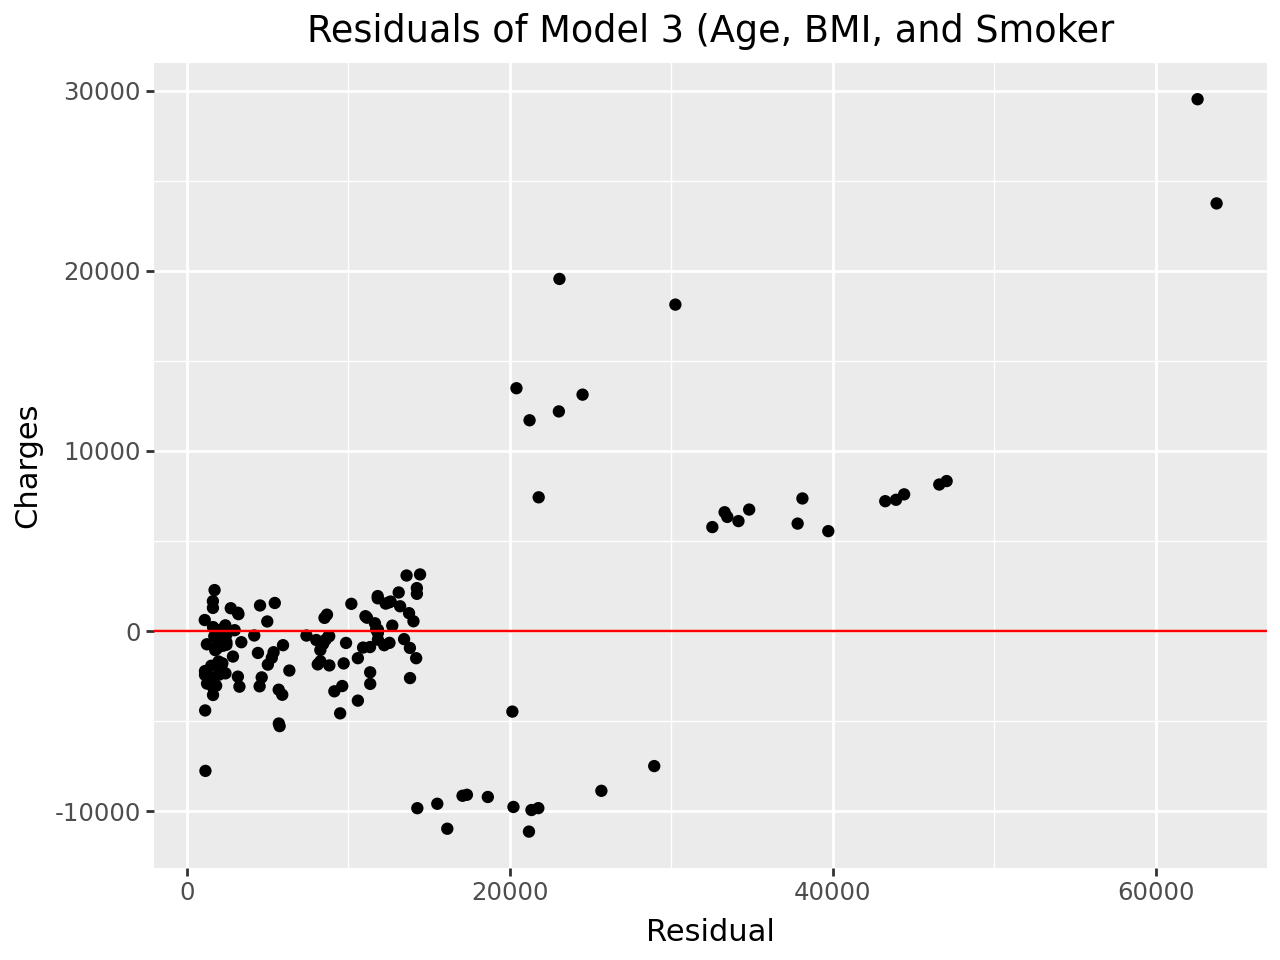

In [228]:
# Calculate residuals for Model 3
residuals_df = df2_with_dummies['charges'] - y_new_preds3

# Create a DataFrame for plotting residuals
scatter_plot = pd.DataFrame({'y': df2_with_dummies['charges'], 'y_resid': residuals_df})

# Plot the residuals
plot4 = (ggplot(scatter_plot, aes( x='y', y='y_resid'))
   +geom_point()
   +ggtitle("Residuals of Model 3 (Age, BMI, and Smoker")
    + geom_hline(yintercept=0, color='red')
   +xlab("Residual")
   +ylab("Charges")
   )

plot4



## Part Five: Full Exploration

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from plotnine import *
import pandas as pd

# Explore a model with age, bmi, smoker, and their interactions
X = df_with_dummies[['age', 'bmi', 'smoker_yes']]
y = df_with_dummies['charges']

# Polynomial features up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the new data
X_new = df2_with_dummies[['age', 'bmi', 'smoker_yes']]
X_new_poly = poly.transform(X_new)
y_new_pred = model.predict(X_new_poly)

# Calculate MSE on the new data
mse_new = mean_squared_error(df2_with_dummies['charges'], y_new_pred)
print(f"MSE on new data: {mse_new}")

# Plot residuals
residuals = df2_with_dummies['charges'] - y_new_pred
residuals_df = pd.DataFrame({'y': df2_with_dummies['charges'], 'y_resid': residuals})

residuals_df

MSE on new data: 21641661.438212883


,y,y_resid
0,1826.84300,-1952.601343
1,10602.38500,-854.491628
2,1137.01100,-1731.553994
3,14451.83515,90.183128
4,13770.09790,-959.309194
...,...,...
138,34828.65400,945.501090
139,62592.87309,30005.085344
140,37829.72420,9666.924258
141,2464.61880,-1761.692275


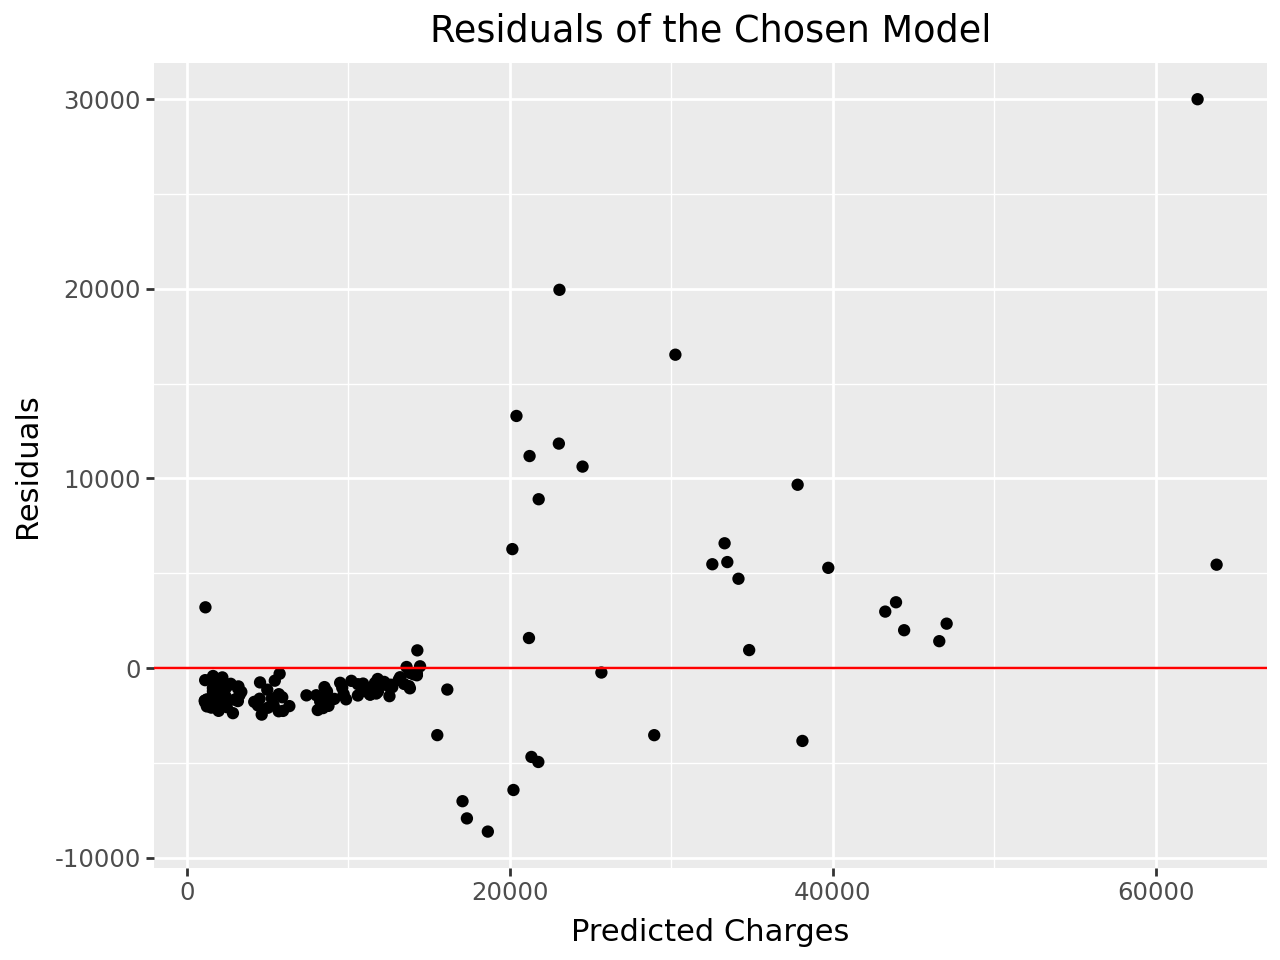

In [231]:
plot = (ggplot(residuals_df, aes(x='y', y='y_resid'))
        + geom_point()
        + ggtitle("Residuals of the Chosen Model")
        + geom_hline(yintercept=0, color='red')
        + xlab("Predicted Charges")
        + ylab("Residuals")
       )

plot

**Model Explanation:**

The best model includes **age, BMI, smoker status, and their interactions**, along with a quadratic term for age to capture nonlinear relationships. This combination minimizes the Mean Squared Error (MSE) on new data, indicating the highest predictive accuracy among tested models. Interaction terms allow the model to capture how age and BMI impact charges differently for smokers, while the polynomial term for age accounts for increasing costs at higher ages. The residual plot confirms the model’s effectiveness, showing predictions centered around zero with minimal bias.